# Display 2D histograms of Nup107 FOV used in PERPL manuscript

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load localisations and build histogram

Choose paths to load from and save to.

In [8]:
input_path = r'data/Nup107_3D_10000_from_36297_locs.csv'
input_path = r'data/NOHEADER_20nm_5pc_filter_74-181nm.csv'
locs = np.loadtxt(input_path, delimiter=',')
print(locs.shape)
# locs.columns

(6749, 2)


### Change binsize as required for histogram

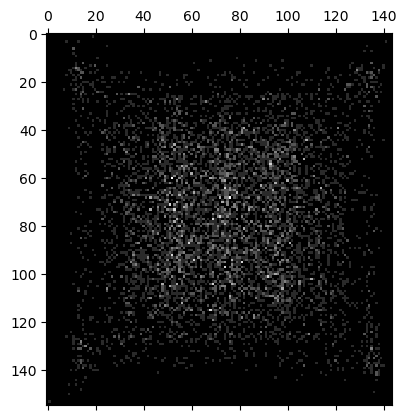

In [17]:
binsize = 10 # Edit
edgex = np.arange(locs[:, 0].min() - 1.5 * binsize, locs[:, 0].max() + 2.5 * binsize, binsize)
edgey = np.arange(locs[:, 1].min() - 1.5 * binsize,
                  locs[:, 1].max() + 2.5 * binsize,
                  binsize)
hist_2d = np.histogram2d(locs[:, 1], locs[:, 0], bins=(edgey, edgex))[0]

plt.matshow(hist_2d, cmap='gray')

In [18]:
## Option to save as binary

In [19]:
hist_2d.tofile(input_path[0:-4] + '_xyhist_' + repr(binsize) + 'nmbins_64bit_w{}_h{}.raw'.format(hist_2d.shape[1], hist_2d.shape[0]))
print('2D histogram shape = ' + repr(hist_2d.shape) + ' (columns, rows).')

2D histogram shape = (155, 144) (columns, rows).


## Zoom in on centre of FOV
### Change binsize and zoom factor (centred on mean x and y values) as required

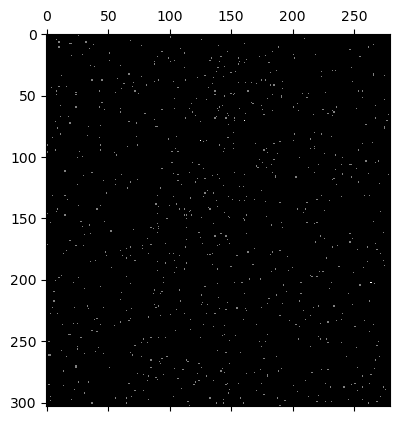

In [16]:
binsize = 1 # Edit
zoomfactor = 5 # Edit
rangex = locs[:, 0].max() - locs[:, 0].min()
rangey = locs[:, 1].max() - locs[:, 1].min()

edgex = np.arange(locs[:, 0].mean() - 1./ (zoomfactor * 2.) * rangex,
                  locs[:, 0].mean() + 1./ (zoomfactor * 2.) * rangex,
                  binsize)
edgey = np.arange(locs[:, 1].mean() - 1./ (zoomfactor * 2.) * rangey,
                  locs[:, 1].mean() + 1./ (zoomfactor * 2.) * rangey,
                  binsize)
hist_2d = np.histogram2d(locs[:, 1], locs[:, 0], bins=(edgey, edgex))[0]

plt.matshow(hist_2d, cmap='gray')

## Option to save as binary

In [ ]:
hist_2d.tofile(input_path[0:-4] + '_xyhist_zoomfactor' + repr(zoomfactor) + '_' + repr(binsize) + 'nmbins_64bit_w{}_h{}.raw'.format(hist_2d.shape[1], hist_2d.shape[0]))
print('2D histogram shape = ' + repr(hist_2d.shape) + ' (columns, rows).')